In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
ratings.head()
#mvoies.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 25000095
Number of unique movieId's: 59047
Number of unique users: 162541
Average number of ratings per user: 153.81
Average number of ratings per movie: 423.39


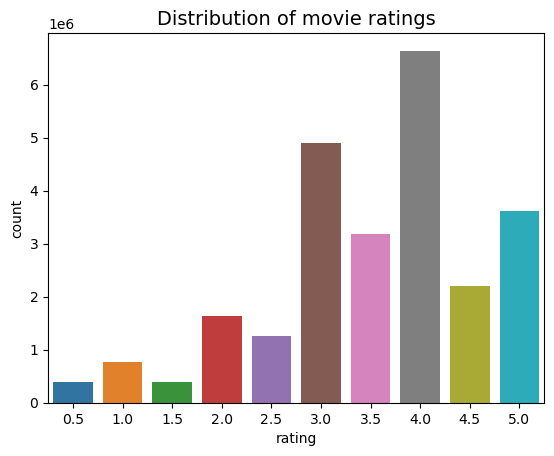

In [8]:
sns.countplot(x = 'rating', data = ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [9]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

Mean global rating: 3.53.


In [11]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 3.68.


In [12]:
ratings['movieId'].value_counts()

movieId
356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: count, Length: 59047, dtype: int64

In [14]:
movie_ratings = ratings.merge(movies, on='movieId')
# movie_ratings
movie_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: count, dtype: int64

In [16]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
# movie_ratings
movies[movies['movieId'] == lowest_rated ]

,movieId,title,genres
5693,5805,Besotted (2001),Drama


In [18]:
highest_rated = mean_ratings['rating'].idxmax()
movies[movies['movieId'] == highest_rated]
# highest_rated

,movieId,title,genres
9416,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary


In [19]:
ratings[ratings['movieId']==highest_rated]

,userId,movieId,rating,timestamp
19328266,125475,27914,5.0,1409649085


In [20]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count','mean'])
movie_stats.head()

,count,mean
movieId,,
1,57309,3.893708
2,24228,3.251527
3,11804,3.142028
4,2523,2.853547
5,11714,3.058434


In [22]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 423.39
Average rating for a given movie: 3.07


In [23]:
lamerica = pd.Series([5,5])
bayesian_avg(lamerica)

3.08

In [27]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
# bayesian_avg_ratings

In [28]:
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,57309,3.893708,3.888
1,2,24228,3.251527,3.248
2,3,11804,3.142028,3.140
3,4,2523,2.853547,2.885
4,5,11714,3.058434,3.059


In [31]:
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values(by='bayesian_avg',ascending=False)
# movie_stats.head()

,movieId,count,mean,bayesian_avg,title
314,318,81482,4.413576,4.407,"Shawshank Redemption, The (1994)"
840,858,52498,4.324336,4.314,"Godfather, The (1972)"
49,50,55366,4.284353,4.275,"Usual Suspects, The (1995)"
1190,1221,34188,4.261759,4.247,"Godfather: Part II, The (1974)"
522,527,60411,4.247579,4.239,Schindler's List (1993)
...,...,...,...,...,...
9603,31698,633,1.232227,1.969,Son of the Mask (2005)
11349,50798,1180,1.457203,1.883,Epic Movie (2007)
6464,6587,758,1.214380,1.880,Gigli (2003)
4669,4775,669,1.125561,1.880,Glitter (2001)


In [34]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
3494,3593,4268,1.578374,1.713,Battlefield Earth (2000)
6464,6587,758,1.214380,1.880,Gigli (2003)
4669,4775,669,1.125561,1.880,Glitter (2001)
11349,50798,1180,1.457203,1.883,Epic Movie (2007)
9603,31698,633,1.232227,1.969,Son of the Mask (2005)


In [36]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [37]:
from collections import Counter

genre_frequency = Counter(g for genres in movies['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 25606,
         'Comedy': 16870,
         'Thriller': 8654,
         'Romance': 7719,
         'Action': 7348,
         'Horror': 5989,
         'Documentary': 5605,
         'Crime': 5319,
         '(no genres listed)': 5062,
         'Adventure': 4145,
         'Sci-Fi': 3595,
         'Children': 2935,
         'Animation': 2929,
         'Mystery': 2925,
         'Fantasy': 2731,
         'War': 1874,
         'Western': 1399,
         'Musical': 1054,
         'Film-Noir': 353,
         'IMAX': 195})

In [38]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 25606), ('Comedy', 16870), ('Thriller', 8654), ('Romance', 7719), ('Action', 7348)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Documentary'),
  Text(7, 0, 'Crime'),
  Text(8, 0, '(no genres listed)'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Children'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Fantasy'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Musical'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, 'IMAX')])

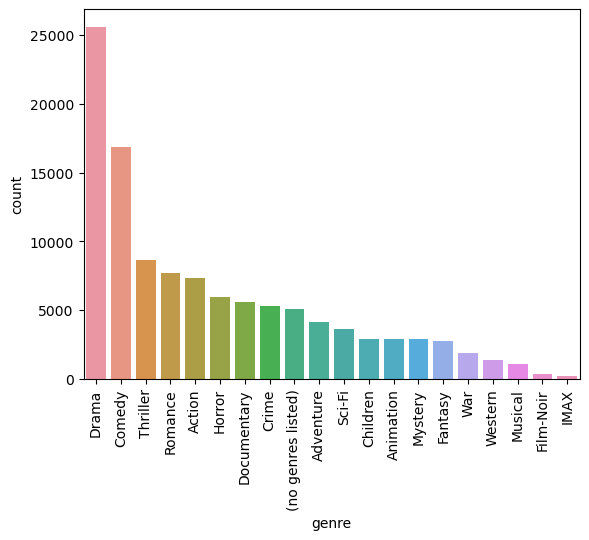

In [55]:
# genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']
# genre_frequency_df.head()

sns.barplot(x='genre',y='count',data = genre_frequency_df.sort_values(by='count',ascending = False))
plt.xticks(rotation=90)

## Data Pre - Processing

In [56]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [57]:
X.shape

(162541, 59047)

## Evaluating Sparcity

In [59]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.26%


In [60]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

162541

In [61]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 32202 movies.
Least active user rated 20 movies.


In [62]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

59047

In [63]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 81491 ratings.
Least rated movie has 1 ratings.


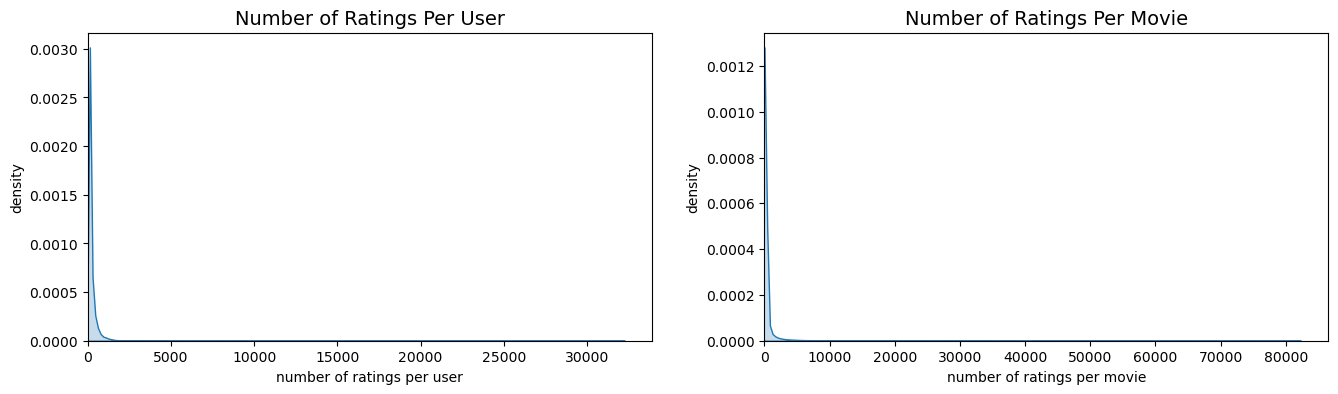

In [65]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

## itme-item recommendations with knn

In [66]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors = k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [67]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[260, 3114, 1270, 356, 480, 1210, 780, 364, 588]

In [69]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
# movie_titles
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Star Wars: Episode IV - A New Hope (1977)
Toy Story 2 (1999)
Back to the Future (1985)
Forrest Gump (1994)
Jurassic Park (1993)
Star Wars: Episode VI - Return of the Jedi (1983)
Independence Day (a.k.a. ID4) (1996)
Lion King, The (1994)
Aladdin (1992)


## Handling the cold-start problem

In [70]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 62423 unique movies in our movies dataset.


In [79]:
genres = set(g for G in movies['genres'] for g in G)
# genres
for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))
    
movie_genres = movies.drop(columns=['movieId', 'title','genres'])
# movies
movie_genres.head()

,War,Animation,Romance,(no genres listed),Comedy,Mystery,Musical,Thriller,Western,Documentary,Fantasy,Drama,Horror,Adventure,Children,Sci-Fi,Crime,Film-Noir,IMAX,Action
0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

def compute_cosine_similarity_in_batches(data, batch_size=1000):
    num_samples, num_features = data.shape
    num_batches = (num_samples + batch_size - 1) // batch_size
    
    cosine_similarities = []
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_samples)
        batch_data = data[start_idx:end_idx]
        
        # Pad the last batch with zeros if necessary
        if batch_data.shape[0] < batch_size:
            padding_size = batch_size - batch_data.shape[0]
            batch_data = np.pad(batch_data, ((0, padding_size), (0, 0)), mode='constant')
        
        # Convert batch data to sparse matrix
        sparse_batch_data = csr_matrix(batch_data)
        
        # Compute cosine similarity for the batch
        batch_cosine_sim = cosine_similarity(sparse_batch_data, sparse_batch_data)
        cosine_similarities.append(batch_cosine_sim)
    
    # Combine cosine similarities from all batches
    cosine_sim_matrix = np.vstack(cosine_similarities)
    return cosine_sim_matrix

# Example usage:
# Assuming movie_genres contains your data
# Modify the batch size according to your system's memory capacity
batch_size = 1000
cosine_sim_matrix = compute_cosine_similarity_in_batches(movie_genres, batch_size)

print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim_matrix.shape}")


Dimensions of our genres cosine similarity matrix: (63000, 1000)


In [105]:
cosine_sim_matrix[0]

array([1.        , 0.77459667, 0.31622777, 0.25819889, 0.4472136 ,
       0.        , 0.31622777, 0.63245553, 0.        , 0.25819889,
       0.25819889, 0.31622777, 0.77459667, 0.        , 0.25819889,
       0.        , 0.        , 0.4472136 , 0.4472136 , 0.2       ,
       0.25819889, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31622777, 0.        , 0.4       , 0.        ,
       0.        , 0.        , 0.25819889, 0.31622777, 0.        ,
       0.        , 0.        , 0.63245553, 0.31622777, 0.        ,
       0.        , 0.        , 0.        , 0.51639778, 0.25819889,
       0.        , 0.        , 0.4       , 0.        , 0.        ,
       0.        , 0.25819889, 0.31622777, 0.63245553, 0.        ,
       0.89442719, 0.        , 0.25819889, 0.        , 0.77459667,
       0.        , 0.        , 0.31622777, 0.31622777, 0.4472136 ,
       0.        , 0.        , 0.31622777, 0.4472136 , 0.2236068 ,
       0.        , 0.31622777, 0.        , 0.        , 0.31622

## Creating a movie finder function

In [96]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]


In [97]:
title = movie_finder('juminji')
title

'Jumanji (1995)'

In [98]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for Jumanji: {idx}")

Movie index for Jumanji: 1


In [110]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim_matrix[idx]))
# sim_scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
sim_scores

[(59, 1.0000000000000002),
 (124, 1.0000000000000002),
 (986, 1.0000000000000002),
 (55, 0.8660254037844388),
 (898, 0.8660254037844388),
 (7, 0.816496580927726),
 (144, 0.816496580927726),
 (156, 0.816496580927726),
 (235, 0.816496580927726),
 (479, 0.816496580927726)]

In [111]:
similar_movies = [i[0] for i in sim_scores]
similar_movies

[59, 124, 986, 55, 898, 7, 144, 156, 235, 479]

In [112]:
print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Jumanji (1995):


59                    Indian in the Cupboard, The (1995)
124                    NeverEnding Story III, The (1994)
986                      Escape to Witch Mountain (1975)
55                        Kids of the Round Table (1995)
898                             Wizard of Oz, The (1939)
7                                    Tom and Huck (1995)
144                  Amazing Panda Adventure, The (1995)
156                                        Casper (1995)
235    Far From Home: The Adventures of Yellow Dog (1...
479                                        Lassie (1994)
Name: title, dtype: object

### Dimensionality Reduction with Matrix Factorization (advanced)

In [117]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20 , n_iter= 10)
Q = svd.fit_transform(X.T)
Q.shape
# X.shape

(59047, 20)

In [118]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Willy Wonka & the Chocolate Factory (1971)
Toy Story 2 (1999)
Independence Day (a.k.a. ID4) (1996)
Lion King, The (1994)
Bug's Life, A (1998)
Mission: Impossible (1996)
Aladdin (1992)
Back to the Future (1985)
Jurassic Park (1993)


The results above are the most similar movies to Toy Story using kNN on our “compressed” movie-factor matrix. We reduced the dimensions down to n_components=20. We can think of each component representing a latent feature such as movie genre.